## 1. Import delle librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Configurazione per la visualizzazione
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Caricamento e prima esplorazione dei dati

In [2]:
# Caricamento del dataset
df = pd.read_csv('adult.csv')

print("Dimensioni del dataset:", df.shape)
print("\nPrime righe del dataset:")
df.head(10)

Dimensioni del dataset: (32561, 15)

Prime righe del dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
# Informazioni generali sul dataset
print("Informazioni sul dataset:")
df.info()

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Statistiche descrittive per le variabili numeriche
print("Statistiche descrittive:")
df.describe()

Statistiche descrittive:


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Distribuzione della variabile target (income):
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Percentuali:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


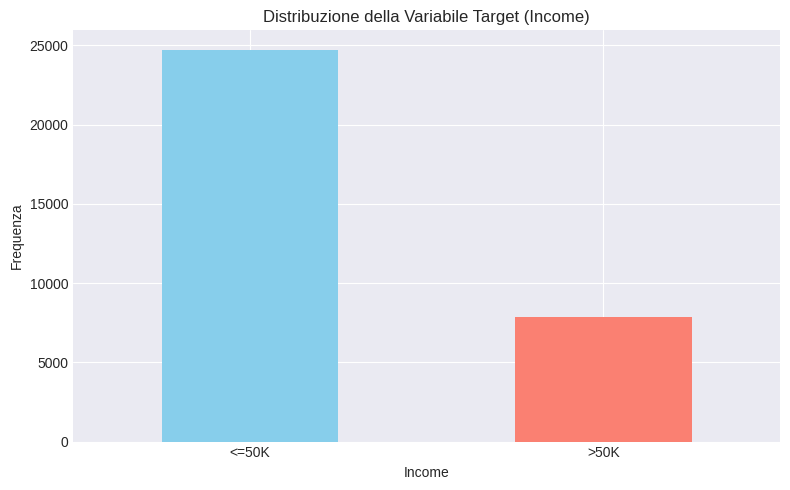

In [5]:
# Distribuzione della variabile target
print("Distribuzione della variabile target (income):")
print(df['income'].value_counts())
print("\nPercentuali:")
print(df['income'].value_counts(normalize=True) * 100)

# Visualizzazione
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuzione della Variabile Target (Income)')
plt.xlabel('Income')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. Gestione dei valori mancanti o simili

In [6]:
# Controllo dei valori mancanti (incluso '?')
print("Valori mancanti per colonna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Il dataset Adult usa '?' per i valori mancanti
print("\nControllo dei valori '?' per colonna:")
for col in df.columns:
    if df[col].dtype == 'object':
        count = (df[col] == '?').sum()
        if count > 0:
            print(f"{col}: {count} ({count/len(df)*100:.2f}%)")

Valori mancanti per colonna:
Series([], dtype: int64)

Controllo dei valori '?' per colonna:
workclass: 1836 (5.64%)
occupation: 1843 (5.66%)
native.country: 583 (1.79%)


In [7]:
# Sostituzione dei '?' con NaN
df.replace('?', np.nan, inplace=True)

In [8]:
# Gestione dei valori mancanti
# Per le colonne categoriche, sostituiamo con la moda
# Per le colonne numeriche, sostituiamo con la mediana
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            # Sostituiamo con la moda per le categoriche
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Colonna '{col}': sostituiti {df[col].isnull().sum()} valori mancanti con '{mode_value}' (moda)")
        else:
            # Sostituiamo con la mediana per le numeriche
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Colonna '{col}': sostituiti valori mancanti con {median_value} (mediana)")

print("\nVerifica finale dei valori mancanti:")
print(df.isnull().sum().sum())

Colonna 'workclass': sostituiti 0 valori mancanti con 'Private' (moda)
Colonna 'occupation': sostituiti 0 valori mancanti con 'Prof-specialty' (moda)
Colonna 'native.country': sostituiti 0 valori mancanti con 'United-States' (moda)

Verifica finale dei valori mancanti:
0


## 4. Encoding delle variabili categoriche

In [9]:
# Identificazione delle colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Rimuoviamo la variabile target dalla lista delle categoriche
if 'income' in categorical_cols:
    categorical_cols.remove('income')

print(f"Colonne numeriche ({len(numerical_cols)}): {numerical_cols}")
print(f"\nColonne categoriche ({len(categorical_cols)}): {categorical_cols}")

# Encoding della variabile target
# '<=50K' -> 0, '>50K' -> 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# label encoding della variabile income
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

print("Encoding della variabile target completato:")
print(df['income'].value_counts())

Colonne numeriche (6): ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Colonne categoriche (8): ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
Encoding della variabile target completato:
income
0    24720
1     7841
Name: count, dtype: int64


In [10]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## 5. Scaling delle feature numeriche

In [11]:
# Separazione delle feature e del target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

print(f"Shape delle feature (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")
print(f"\nDistribuzione del target:")
print(y.value_counts())

Shape delle feature (X): (32561, 97)
Shape del target (y): (32561,)

Distribuzione del target:
income
0    24720
1     7841
Name: count, dtype: int64


In [12]:
# Identificazione delle colonne numeriche nel dataset encodato
# (colonne che non sono dummy variables)
numeric_features = [col for col in numerical_cols if col in X.columns]

print(f"Colonne numeriche da scalare: {numeric_features}")

# Inizializzazione dello StandardScaler
scaler = StandardScaler()

# Scaling solo delle feature numeriche
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print("\nScaling completato!")
print("\nStatistiche dopo lo scaling:")
print(X[numeric_features].describe())

Colonne numeriche da scalare: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Scaling completato!

Statistiche dopo lo scaling:
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  3.256100e+04  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04   
mean  -2.793203e-17 -9.928962e-17   1.466431e-16  5.586405e-17 -5.586405e-17   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582206e+00 -1.681631e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   
25%   -7.757679e-01 -6.816910e-01  -4.200596e-01 -1.459205e-01 -2.166595e-01   
50%   -1.159546e-01 -1.082193e-01  -3.136003e-02 -1.459205e-01 -2.166595e-01   
75%    6.904838e-01  4.478765e-01   7.460392e-01 -1.459205e-01 -2.166595e-01   
max    3.769612e+00  1.226856e+01   2.300838e+00  1.339458e+01  1.059351e+01   

       hours.per.week  
count    3.256100e+04  
mean    -2.444052e-17  
std      1.000015e+00  
min     -3.194030

## 6. Split Train/Test

In [13]:
# Split train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Manteniamo la stessa proporzione delle classi
)

print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")
print(f"\nDistribuzione delle classi nel training set:")
print(y_train.value_counts())
print(f"\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())

Dimensioni del training set: (26048, 97)
Dimensioni del test set: (6513, 97)

Distribuzione delle classi nel training set:
income
0    19775
1     6273
Name: count, dtype: int64

Distribuzione delle classi nel test set:
income
0    4945
1    1568
Name: count, dtype: int64


## 7. Bilanciamento classi

In [14]:
# Applicazione di SMOTE al training set
print("Applicazione di SMOTE per bilanciare le classi...")

# Inizializzazione di SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Applicazione di SMOTE solo al training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nSMOTE applicato con successo!")
print(f"\nDimensioni PRIMA di SMOTE:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"\nDimensioni DOPO SMOTE:")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"y_train_balanced: {y_train_balanced.shape}")

Applicazione di SMOTE per bilanciare le classi...

SMOTE applicato con successo!

Dimensioni PRIMA di SMOTE:
X_train: (26048, 97)
y_train: (26048,)

Dimensioni DOPO SMOTE:
X_train_balanced: (39550, 97)
y_train_balanced: (39550,)


## 8. Normalizzazione

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)